In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

## 1. Collect the Data

In [37]:
# Loading the CSV data to a Pandas DataFrame
student_data = pd.read_csv('data/student_dropout_dataset_v3.csv')

# Print the first 5 rows
student_data.head()

,Student_ID,Age,Gender,Family_Income,Internet_Access,Study_Hours_per_Day,Attendance_Rate,Assignment_Delay_Days,Travel_Time_Minutes,Part_Time_Job,Scholarship,Stress_Index,GPA,Semester_GPA,CGPA,Semester,Department,Parental_Education,Dropout
0,1,22.1,Male,25000.0,Yes,3.36,86.1,2,20.4,Yes,No,5.5,0.96,0.90,0.90,Year 1,Arts,High School,0
1,2,20.7,Male,25000.0,Yes,4.30,68.0,2,44.0,No,No,6.8,1.28,1.20,1.19,Year 3,Engineering,Bachelor,1
2,3,22.4,Male,40183.0,Yes,4.40,70.9,0,48.9,Yes,No,5.5,1.68,1.32,1.32,Year 1,Arts,Master,0
3,4,24.4,Male,NaN,Yes,NaN,82.2,2,38.6,No,No,NaN,1.78,1.77,1.77,Year 1,CS,High School,1
4,5,20.5,Female,25319.0,Yes,4.19,75.7,1,23.0,No,No,7.0,1.48,0.91,0.87,Year 4,Business,Bachelor,0


In [38]:
# Print last 5 rows of the dataset
student_data.tail()

,Student_ID,Age,Gender,Family_Income,Internet_Access,Study_Hours_per_Day,Attendance_Rate,Assignment_Delay_Days,Travel_Time_Minutes,Part_Time_Job,Scholarship,Stress_Index,GPA,Semester_GPA,CGPA,Semester,Department,Parental_Education,Dropout
9995,9996,23.9,Female,42286.0,No,4.62,92.0,0,10.0,Yes,Yes,5.5,1.60,0.99,0.97,Year 2,Arts,Bachelor,0
9996,9997,17.0,Female,61103.0,Yes,2.87,75.2,3,32.4,No,Yes,6.7,3.09,3.09,3.09,Year 1,Business,Master,1
9997,9998,19.4,Male,25000.0,Yes,4.73,74.9,4,25.4,No,No,3.5,3.45,3.37,3.43,Year 4,Business,Bachelor,0
9998,9999,22.1,Female,40302.0,Yes,5.85,74.2,1,5.0,No,Yes,6.2,3.35,3.34,3.34,Year 1,CS,High School,0
9999,10000,22.4,Female,76796.0,Yes,4.95,83.7,1,15.5,Yes,No,7.9,2.17,2.20,2.20,Year 1,Arts,Master,0


In [39]:
# Number of rows and columns in the dataset
print(f"Dataset shape: {student_data.shape}")
print(f"Total samples: {student_data.shape[0]}, Total features: {student_data.shape[1]}")

Dataset shape: (10000, 19)
Total samples: 10000, Total features: 19


## 2. Explore the Data

In [40]:
# Getting info about data types and non-null counts
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             10000 non-null  int64  
 1   Age                    10000 non-null  float64
 2   Gender                 10000 non-null  object 
 3   Family_Income          9500 non-null   float64
 4   Internet_Access        10000 non-null  object 
 5   Study_Hours_per_Day    9500 non-null   float64
 6   Attendance_Rate        10000 non-null  float64
 7   Assignment_Delay_Days  10000 non-null  int64  
 8   Travel_Time_Minutes    10000 non-null  float64
 9   Part_Time_Job          10000 non-null  object 
 10  Scholarship            10000 non-null  object 
 11  Stress_Index           9500 non-null   float64
 12  GPA                    10000 non-null  float64
 13  Semester_GPA           10000 non-null  float64
 14  CGPA                   10000 non-null  float64
 15  Sem

In [41]:
# Statistical summary of numerical features
student_data.describe()

,Student_ID,Age,Family_Income,Study_Hours_per_Day,Attendance_Rate,Assignment_Delay_Days,Travel_Time_Minutes,Stress_Index,GPA,Semester_GPA,CGPA,Dropout
count,10000.00000,10000.00000,9500.000000,9500.000000,10000.00000,10000.000000,10000.00000,9500.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,21.02606,38377.247474,4.014592,81.73683,1.799700,30.17926,5.507147,2.308440,2.300057,2.298761,0.23540
std,2886.89568,2.13981,20496.232179,1.295450,8.22093,1.344307,11.91887,1.765951,1.061717,1.074407,1.072555,0.42427
min,1.00000,17.00000,25000.000000,0.500000,38.20000,0.000000,5.00000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,19.50000,25000.000000,3.160000,76.40000,1.000000,21.90000,4.300000,1.550000,1.520000,1.520000,0.00000
50%,5000.50000,21.00000,29740.500000,4.000000,81.80000,2.000000,30.20000,5.500000,2.350000,2.350000,2.350000,0.00000
75%,7500.25000,22.50000,44520.000000,4.870000,87.30000,3.000000,38.40000,6.700000,3.120000,3.150000,3.150000,0.00000
max,10000.00000,29.60000,316601.000000,8.980000,100.00000,8.000000,74.90000,10.000000,4.000000,4.000000,4.000000,1.00000


Dropout Distribution:
Dropout
0    7646
1    2354
Name: count, dtype: int64

Dropout Rate: 23.54%


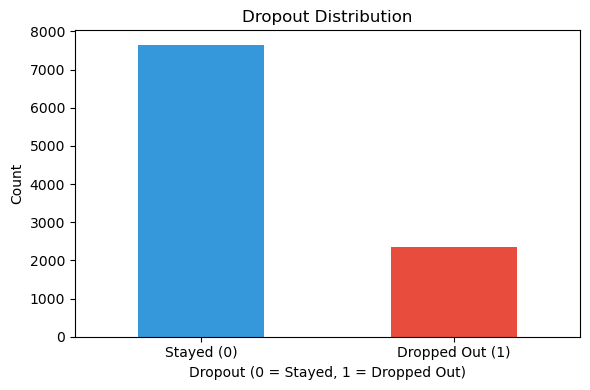

In [42]:
# Checking the distribution of the target variable (Dropout)
print("Dropout Distribution:")
print(student_data['Dropout'].value_counts())
print(f"\nDropout Rate: {student_data['Dropout'].mean()*100:.2f}%")

# Visualize target distribution
fig, ax = plt.subplots(figsize=(6, 4))
student_data['Dropout'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'], ax=ax)
ax.set_title('Dropout Distribution')
ax.set_xlabel('Dropout (0 = Stayed, 1 = Dropped Out)')
ax.set_ylabel('Count')
ax.set_xticklabels(['Stayed (0)', 'Dropped Out (1)'], rotation=0)
plt.tight_layout()
plt.savefig('images/DropoutDistribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Handle Missing Values

In [43]:
# Check missing values per column
missing_values = student_data.isnull().sum()
missing_percent = (student_data.isnull().sum() / len(student_data)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent
})
print("Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Summary:
                     Missing Count  Missing %
Family_Income                  500       5.00
Study_Hours_per_Day            500       5.00
Stress_Index                   500       5.00
Parental_Education             511       5.11


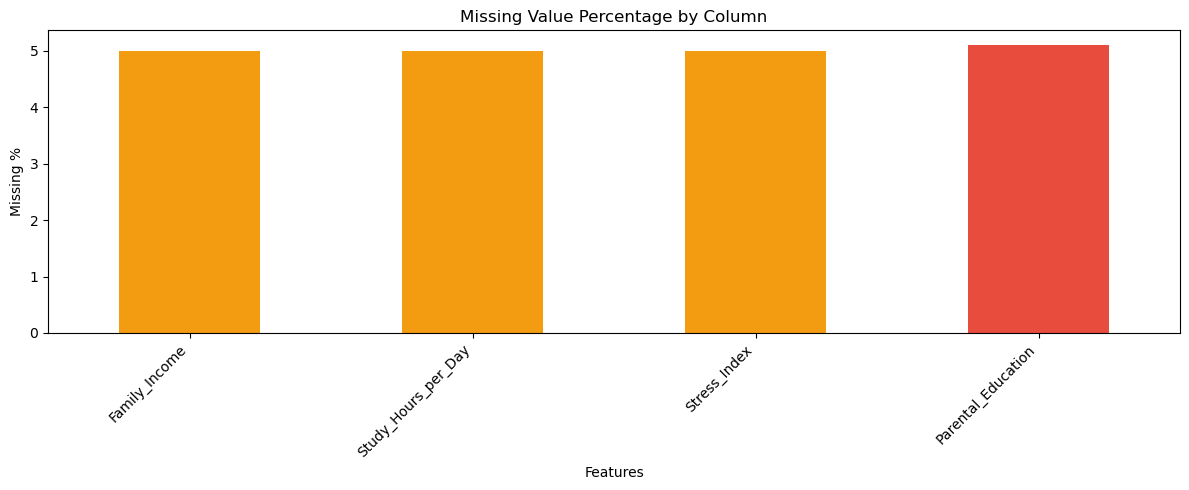

In [44]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 5))
cols_with_missing = missing_df[missing_df['Missing Count'] > 0].index.tolist()

if cols_with_missing:
    colors = ['#e74c3c' if pct > 5 else '#f39c12' for pct in missing_df.loc[cols_with_missing, 'Missing %']]
    missing_df.loc[cols_with_missing, 'Missing %'].plot(kind='bar', color=colors, ax=ax)
    ax.set_title('Missing Value Percentage by Column')
    ax.set_ylabel('Missing %')
    ax.set_xlabel('Features')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('images/MissingValues.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("No missing values found!")

In [45]:
# Fill missing numerical values with median (robust to outliers)
numerical_cols = student_data.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    if student_data[col].isnull().sum() > 0:
        median_val = student_data[col].median()
        student_data[col].fillna(median_val, inplace=True)
        print(f"Filled '{col}' missing values with median: {median_val}")

# Fill missing categorical values with mode
categorical_cols = student_data.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    if student_data[col].isnull().sum() > 0:
        mode_val = student_data[col].mode()[0]
        student_data[col].fillna(mode_val, inplace=True)
        print(f"Filled '{col}' missing values with mode: {mode_val}")

# Verify no missing values remain
print(f"\nTotal missing values remaining: {student_data.isnull().sum().sum()}")

Filled 'Family_Income' missing values with median: 29740.5
Filled 'Study_Hours_per_Day' missing values with median: 4.0
Filled 'Stress_Index' missing values with median: 5.5
Filled 'Parental_Education' missing values with mode: Bachelor

Total missing values remaining: 0


/tmp/ipykernel_13003/3511742248.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_data[col].fillna(median_val, inplace=True)
/tmp/ipykernel_13003/3511742248.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

## 4. Encode Categorical Variables

In [46]:
# Identify all object (categorical) columns
print("Categorical columns and their unique values:\n")
for col in student_data.select_dtypes(include=['object']).columns:
    print(f"  {col}: {student_data[col].unique()}")

Categorical columns and their unique values:

  Gender: ['Male' 'Female']
  Internet_Access: ['Yes' 'No']
  Part_Time_Job: ['Yes' 'No']
  Scholarship: ['No' 'Yes']
  Semester: ['Year 1' 'Year 3' 'Year 4' 'Year 2']
  Department: ['Arts' 'Engineering' 'CS' 'Business' 'Science']
  Parental_Education: ['High School' 'Bachelor' 'Master' 'PhD']


In [47]:
# Binary encoding for binary categorical features
student_data['Gender'] = student_data['Gender'].map({'Male': 1, 'Female': 0})
student_data['Internet_Access'] = student_data['Internet_Access'].map({'Yes': 1, 'No': 0})
student_data['Part_Time_Job'] = student_data['Part_Time_Job'].map({'Yes': 1, 'No': 0})
student_data['Scholarship'] = student_data['Scholarship'].map({'Yes': 1, 'No': 0})

# Ordinal encoding for Parental_Education (has natural order)
education_order = {'None': 0, 'High School': 1, 'Bachelor': 2, 'Master': 3}
student_data['Parental_Education'] = student_data['Parental_Education'].map(education_order)

# Ordinal encoding for Semester (has natural order)
semester_order = {'Year 1': 1, 'Year 2': 2, 'Year 3': 3, 'Year 4': 4}
student_data['Semester'] = student_data['Semester'].map(semester_order)

# One-hot encoding for Department (no natural order)
student_data = pd.get_dummies(student_data, columns=['Department'], drop_first=True)

print("Encoding complete. Updated columns:")
print(student_data.dtypes)

Encoding complete. Updated columns:
Student_ID                  int64
Age                       float64
Gender                      int64
Family_Income             float64
Internet_Access             int64
Study_Hours_per_Day       float64
Attendance_Rate           float64
Assignment_Delay_Days       int64
Travel_Time_Minutes       float64
Part_Time_Job               int64
Scholarship                 int64
Stress_Index              float64
GPA                       float64
Semester_GPA              float64
CGPA                      float64
Semester                    int64
Parental_Education        float64
Dropout                     int64
Department_Business          bool
Department_CS                bool
Department_Engineering       bool
Department_Science           bool
dtype: object


## 5. Exploratory Data Analysis (EDA)

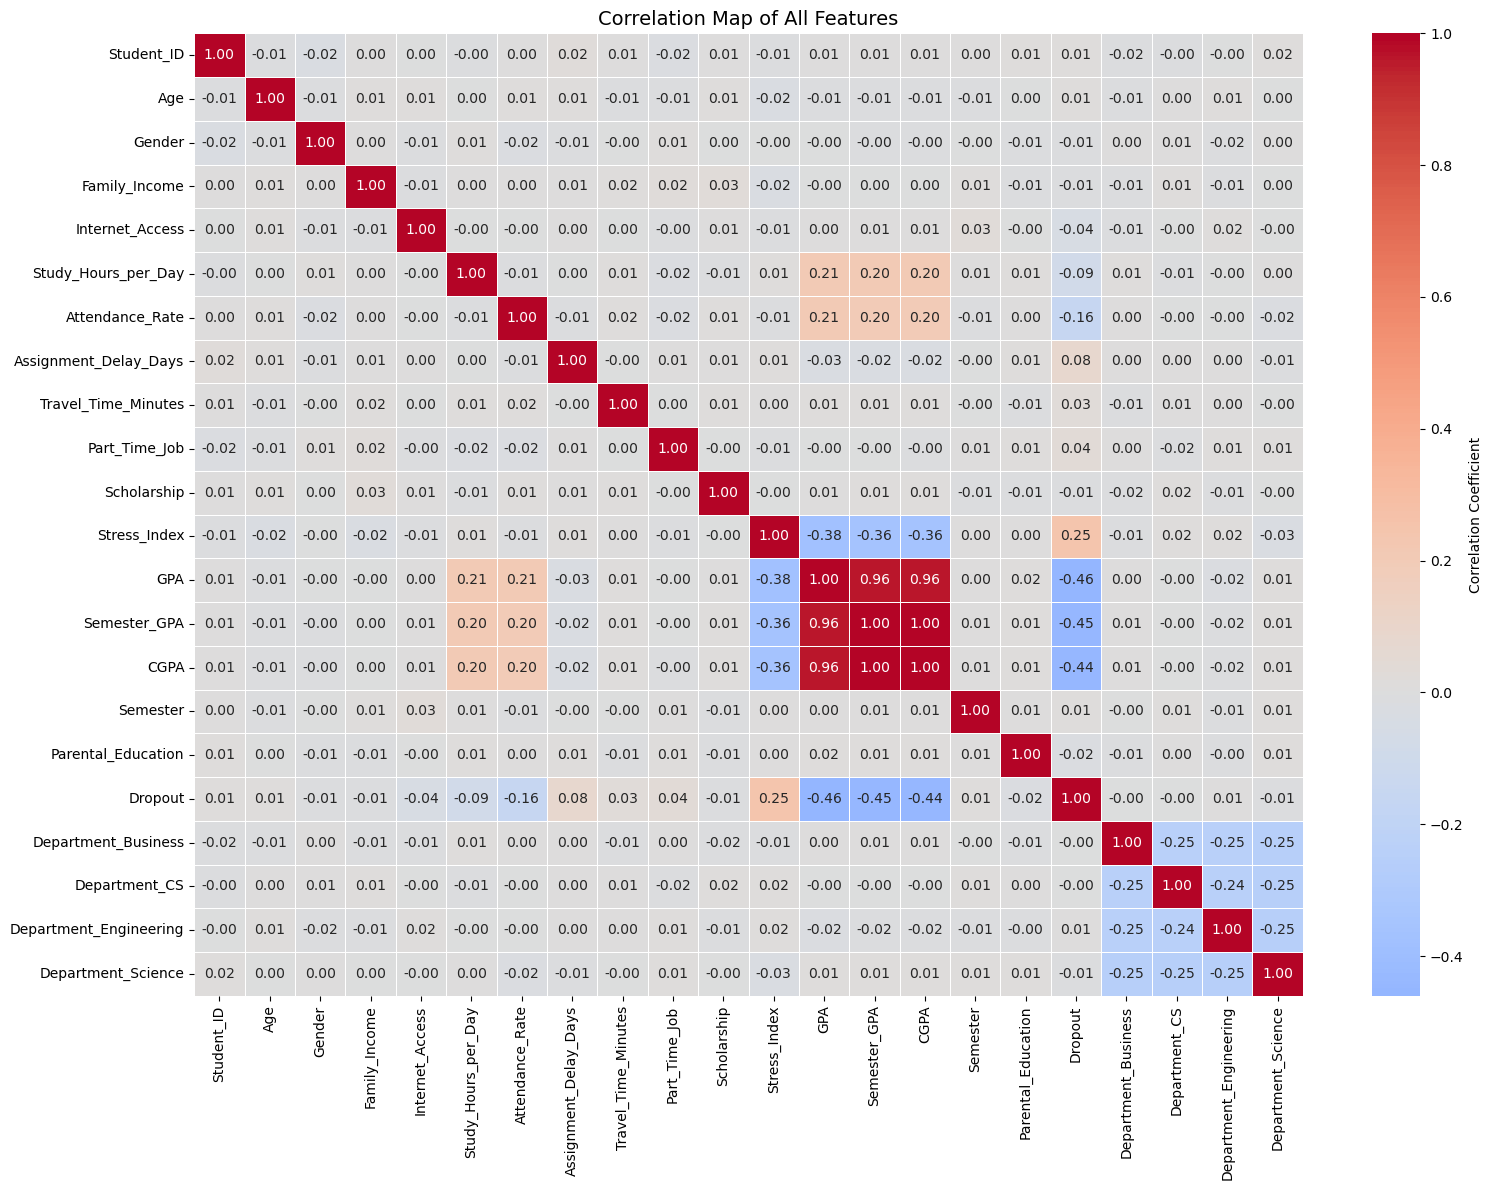

In [48]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
corr_matrix = student_data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='white',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Map of All Features', fontsize=14)
plt.tight_layout()
plt.savefig('images/CorrelationMapOfFeatures.png', dpi=150, bbox_inches='tight')
plt.show()

Feature Correlations with Dropout:

Stress_Index              0.249361
Assignment_Delay_Days     0.082327
Part_Time_Job             0.036781
Travel_Time_Minutes       0.028080
Semester                  0.010658
Age                       0.007585
Student_ID                0.007434
Department_Engineering    0.005386
Department_CS            -0.001587
Department_Business      -0.002516
Department_Science       -0.005920
Scholarship              -0.006661
Gender                   -0.007265
Family_Income            -0.010324
Parental_Education       -0.021063
Internet_Access          -0.043205
Study_Hours_per_Day      -0.087163
Attendance_Rate          -0.163539
CGPA                     -0.444807
Semester_GPA             -0.445396
GPA                      -0.460352


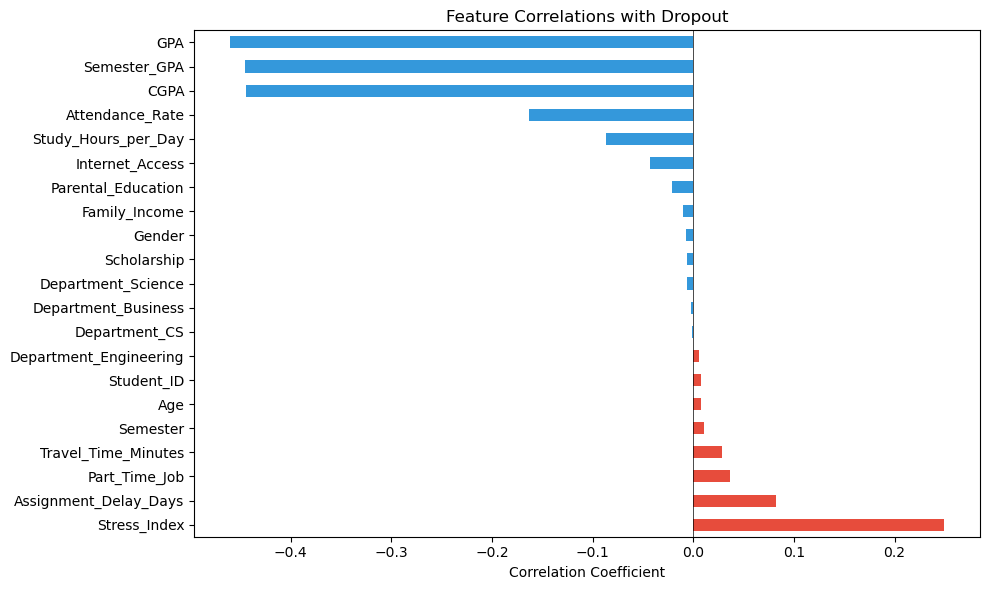

In [49]:
# Top correlations with Dropout target
dropout_corr = corr_matrix['Dropout'].drop('Dropout').sort_values(ascending=False)
print("Feature Correlations with Dropout:\n")
print(dropout_corr.to_string())

# Visualize correlations with target
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#e74c3c' if v > 0 else '#3498db' for v in dropout_corr.values]
dropout_corr.plot(kind='barh', color=colors, ax=ax)
ax.set_title('Feature Correlations with Dropout')
ax.set_xlabel('Correlation Coefficient')
ax.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.savefig('images/FeatureCorrelationsWithDropout.png', dpi=150, bbox_inches='tight')
plt.show()

/tmp/ipykernel_13003/4145396419.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Stayed (0)', 'Dropped Out (1)'])
/tmp/ipykernel_13003/4145396419.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Stayed (0)', 'Dropped Out (1)'])
/tmp/ipykernel_13003/4145396419.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Stayed (0)', 'Dropped Out (1)'])
/tmp/ipykernel_13003/4145396419.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Stayed (0)', 'Dropped Out (1)'])
/tmp/ipykernel_13003/4145396419.py:12: UserWarning: set_ticklabels() should only be used

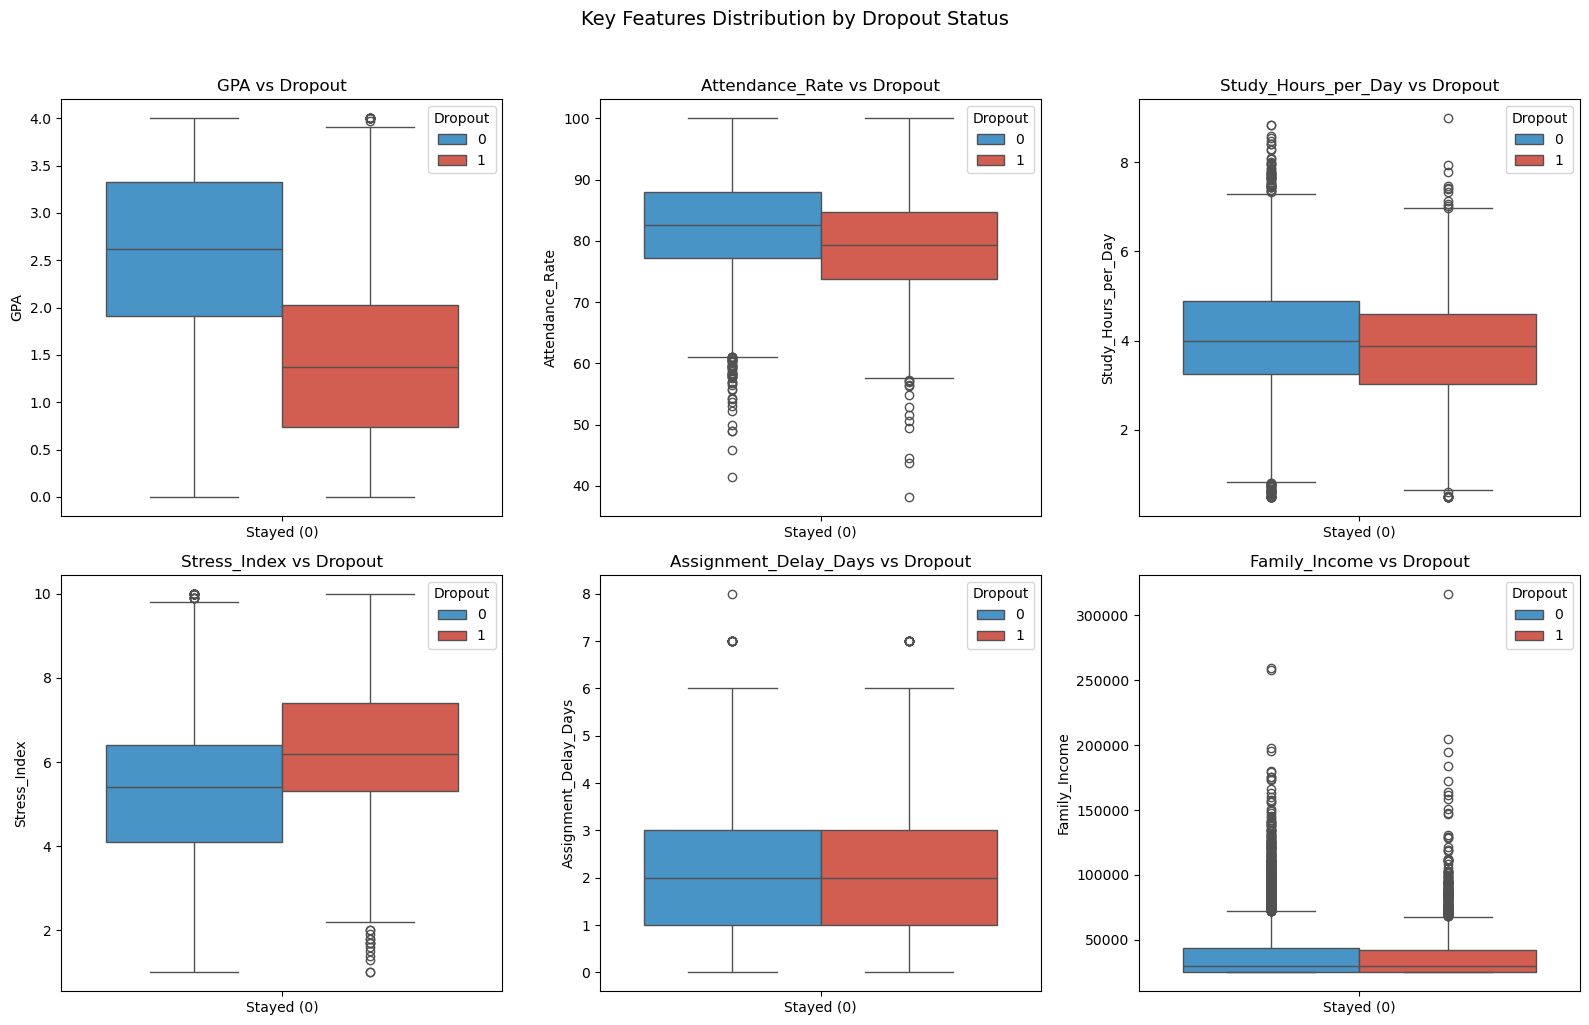

In [52]:
# Boxplots for key numerical features vs Dropout
key_features = ['GPA', 'Attendance_Rate', 'Study_Hours_per_Day', 'Stress_Index',
                'Assignment_Delay_Days', 'Family_Income']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(key_features):
    sns.boxplot(data=student_data, hue='Dropout', y=col, ax=axes[i],
                palette={0: '#3498db', 1: '#e74c3c'})
    axes[i].set_title(f'{col} vs Dropout')
    axes[i].set_xticklabels(['Stayed (0)', 'Dropped Out (1)'])

plt.suptitle('Key Features Distribution by Dropout Status', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('images/BoxplotsKeyFeatures.png', dpi=150, bbox_inches='tight')
plt.show()

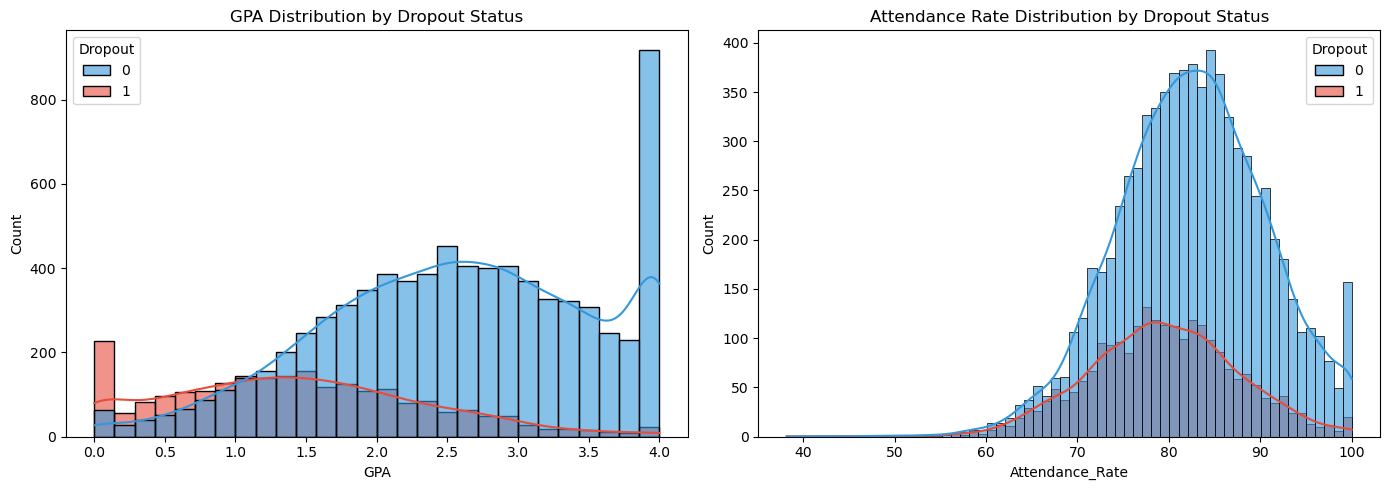

In [53]:
# Distribution plots for GPA and Attendance by Dropout status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=student_data, x='GPA', hue='Dropout', kde=True, ax=axes[0],
             palette={0: '#3498db', 1: '#e74c3c'}, alpha=0.6)
axes[0].set_title('GPA Distribution by Dropout Status')

sns.histplot(data=student_data, x='Attendance_Rate', hue='Dropout', kde=True, ax=axes[1],
             palette={0: '#3498db', 1: '#e74c3c'}, alpha=0.6)
axes[1].set_title('Attendance Rate Distribution by Dropout Status')

plt.tight_layout()
plt.savefig('images/DistributionPlots.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Prepare the Data

**Dropout:**
- 1 → Student Dropped Out
- 0 → Student Stayed

In [54]:
# Drop Student_ID (not a useful feature for prediction)
student_data = student_data.drop('Student_ID', axis=1)

# Split features and target
X = student_data.drop('Dropout', axis=1)
y = student_data['Dropout']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns:\n{list(X.columns)}")

Features shape: (10000, 20)
Target shape: (10000,)

Feature columns:
['Age', 'Gender', 'Family_Income', 'Internet_Access', 'Study_Hours_per_Day', 'Attendance_Rate', 'Assignment_Delay_Days', 'Travel_Time_Minutes', 'Part_Time_Job', 'Scholarship', 'Stress_Index', 'GPA', 'Semester_GPA', 'CGPA', 'Semester', 'Parental_Education', 'Department_Business', 'Department_CS', 'Department_Engineering', 'Department_Science']


In [55]:
# Split into training (80%) and test (20%) sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"\nTraining set dropout rate: {y_train.mean()*100:.2f}%")
print(f"Test set dropout rate    : {y_test.mean()*100:.2f}%")

X_train shape: (8000, 20)
X_test shape : (2000, 20)

Training set dropout rate: 23.54%
Test set dropout rate    : 23.55%


In [ ]:
# Check for any remaining NaN values after encoding
remaining_nans = X_train.isnull().sum()
if remaining_nans.sum() > 0:
    print("⚠️  NaN values found after encoding — filling with column median:")
    print(remaining_nans[remaining_nans > 0])
    X_train = X_train.fillna(X_train.median())
    X_test = X_test.fillna(X_test.median())
else:
    print("No NaN values remaining — data is clean.")

# Feature scaling with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transform, never fit on test data

print(f"\nFeature scaling complete.")
print(f"X_train_scaled mean (should be ~0): {X_train_scaled.mean():.6f}")
print(f"X_train_scaled std  (should be ~1): {X_train_scaled.std():.6f}")

Feature scaling complete.
X_train_scaled mean (should be ~0): nan
X_train_scaled std  (should be ~1): nan


## 7. Train and Evaluate the Model

### Logistic Regression

In [ ]:
# Cross-validation before final training (5-fold)
cv_model = LogisticRegression(max_iter=1000, random_state=42)

cv_scores = cross_val_score(cv_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"5-Fold Cross-Validation Results:")
print(f"  Fold Accuracies: {cv_scores}")
print(f"  Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"  Std: ±{cv_scores.std():.4f}")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/halil/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/halil/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/halil/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1247, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/home/halil/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/halil/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/home/halil/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1105, in check_array
    _assert_all_finite(
  File "/home/halil/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/home/halil/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
# Train the final Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

print("Model training complete.")

### Model Evaluation

In [ ]:
# Accuracy on training data
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Training Data: {train_accuracy:.4f}")

# Accuracy on test data
y_test_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Data    : {test_accuracy:.4f}")

In [ ]:
# Detailed Classification Report
print("Classification Report (Test Data):\n")
print(classification_report(y_test, y_test_pred, target_names=['Stayed (0)', 'Dropped Out (1)']))

In [ ]:
# F1 Score
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score (Test Data): {f1:.4f}")

In [ ]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            linewidths=0.7,
            linecolor='black',
            xticklabels=['Stayed (0)', 'Dropped Out (1)'],
            yticklabels=['Stayed (0)', 'Dropped Out (1)'],
            cbar_kws={'label': 'Count', 'shrink': 0.8},
            annot_kws={'size': 18, 'weight': 'bold'})
plt.title('Confusion Matrix – Test Set Performance', fontsize=13)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.savefig('images/ConfusionMatrix.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Building a Predictive System

In [ ]:
# Example prediction: predict dropout risk for a sample student
# Features order must match X.columns
sample_student = {
    'Age': 21.0,
    'Gender': 1,                # Male
    'Family_Income': 30000.0,
    'Internet_Access': 1,       # Yes
    'Study_Hours_per_Day': 2.0,
    'Attendance_Rate': 65.0,
    'Assignment_Delay_Days': 4,
    'Travel_Time_Minutes': 45.0,
    'Part_Time_Job': 1,         # Yes
    'Scholarship': 0,           # No
    'Stress_Index': 8.0,
    'GPA': 1.2,
    'Semester_GPA': 0.9,
    'CGPA': 1.0,
    'Semester': 2,              # Year 2
    'Parental_Education': 1,    # High School
}

# Add department one-hot encoded columns (all 0 except the student's department)
for col in X.columns:
    if col.startswith('Department_') and col not in sample_student:
        sample_student[col] = 0

# Set student's department (e.g., Engineering)
if 'Department_Engineering' in X.columns:
    sample_student['Department_Engineering'] = 1

# Create DataFrame and ensure column order matches training data
input_df = pd.DataFrame([sample_student])
input_df = input_df.reindex(columns=X.columns, fill_value=0)

# Scale with the same scaler used for training
input_scaled = scaler.transform(input_df)

# Predict
prediction = model.predict(input_scaled)
probability = model.predict_proba(input_scaled)

if prediction[0] == 1:
    print(f"⚠️  Prediction: The student is AT RISK of dropping out.")
else:
    print(f"✅ Prediction: The student is likely to STAY.")

print(f"\nDropout Probability: {probability[0][1]*100:.2f}%")
print(f"Stay Probability   : {probability[0][0]*100:.2f}%")